# Google Colab Recitation

11785-Introduction to Deep Learning, Carnegie Mellon University

Author: Tianhao Wang (tianhao2@andrew.cmu.edu)

Fall 2021


# Colab Settings

## Google Colab Connection

1. You can connect to Google Colab via your google account by going to https://colab.research.google.com/. Click on ```New Notebook``` and start working.

2. Once you are in the new notebook, you need to choose what Processor you want. So click on ```Edit-> Notebook Settings``` and select a GPU when you need one.

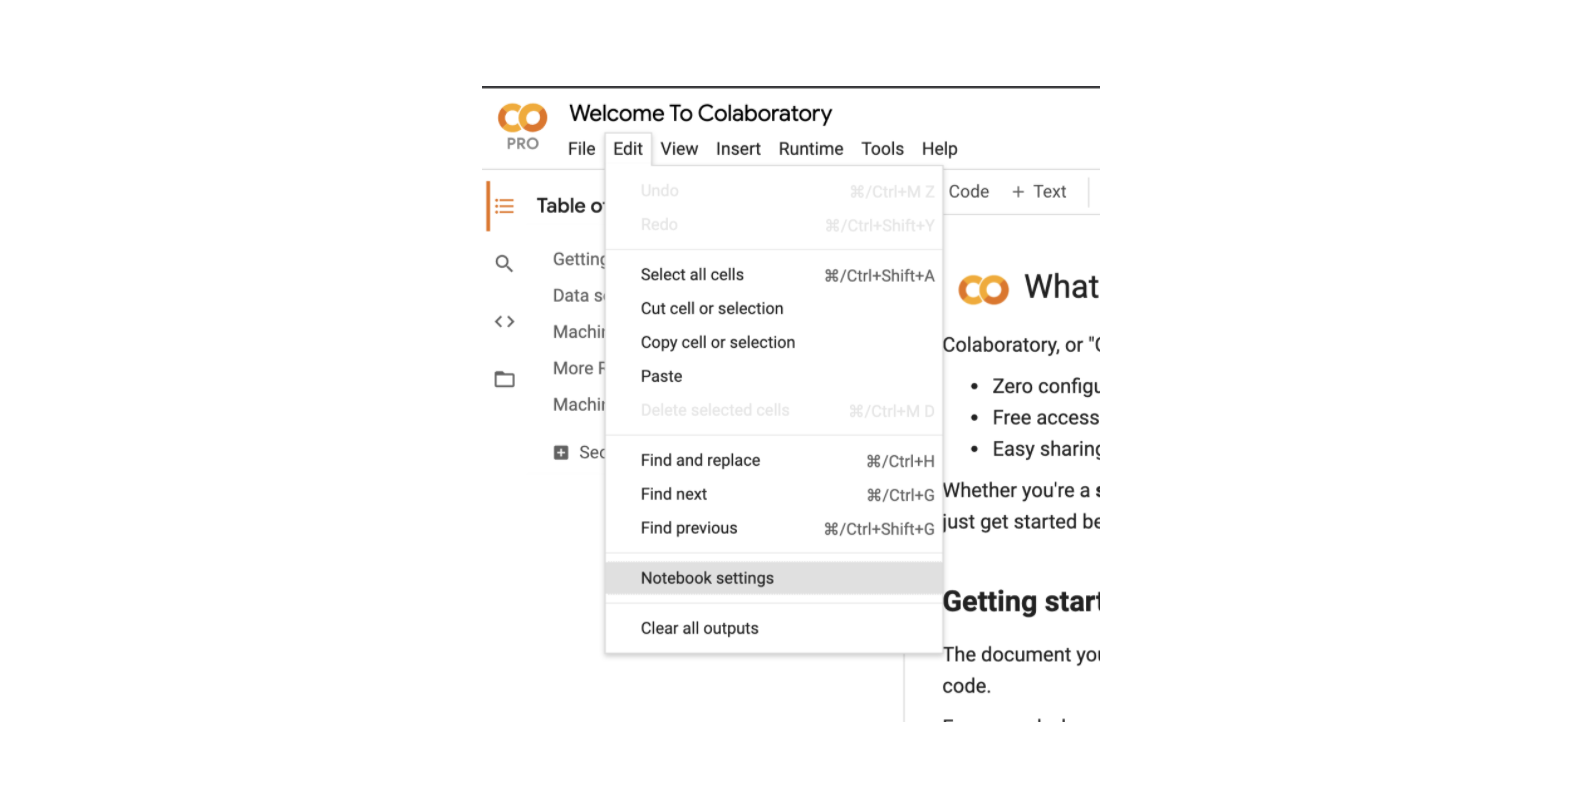

3. You will see a Connect button on top and tada...you have a free GPU now!
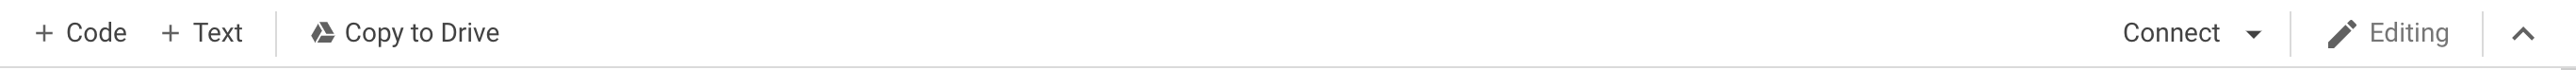

## Mounting Your Google Drive

Once you are connected to a notebook, there will be times when you would want to connect
the storage of this notebook to your drive for various reasons, like, getting input data, saving
or loading your models, etc.


To do that, type the below command and authenticate as instructed.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Then, follow the instruction and enter your authorization code
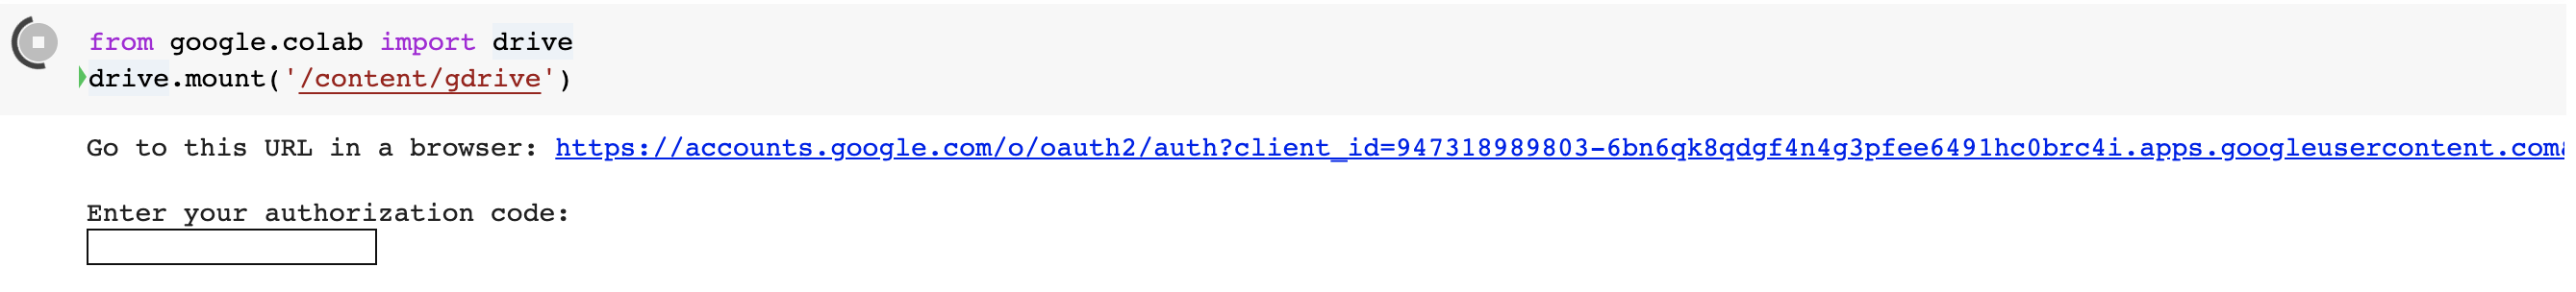

You are good to go if you see the following message
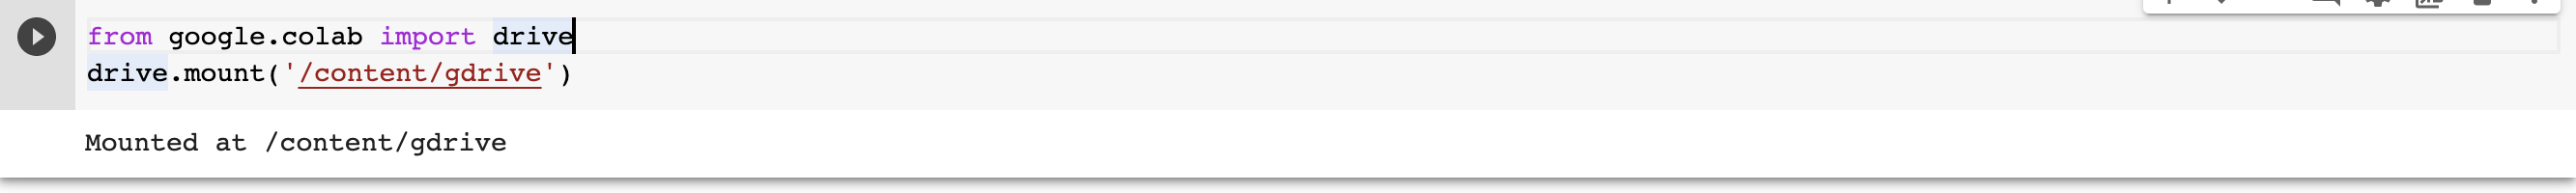

If you want to navigate inside any folder to fetch data/save models, you can do ```cd``` or ```oschdir``` to it.

In [ ]:
%cd gdrive/MyDrive

**tips**: you can run bash commands directly from Colab by adding an ```!``` before your cmd .
However, if you use ```!cd gdrive``` , you will not enter the gdrive folder. You are recommended to always check where you are with ```!pwd```.

## Saving/Loading Models to/from Google Drive

An important part of the models you are building is that you **save** them from time to time and
then **reload** them later to improvise. A simple way to do this is to save them after some epochs.

**tips**: You will definitely cry if Colab crashes abruptly after 3 hours' training (trust me, it happens a
lot). All your progress will be gone if you do not back up. so **SAVE YOUR MODEL FROM TIME TO TIME!!!**

Example Code:

In [ ]:
torch.save({
 'model_state_dict': model.state_dict(),
 'optimizer_state_dict': optimizer.state_dict(),
 'scheduler_state_dict' : scheduler.state_dict(),
}, "gdrive/MyDrive/colab-recitation/model.pt")

You can always add things to the saved model such as best accuracy or validation loss, etc.

In [ ]:
torch.save({
 'model_state_dict': model.state_dict(),
 'optimizer_state_dict': optimizer.state_dict(),
 'scheduler_state_dict' : scheduler.state_dict(),
 'best_accuracy': accuracy,  
}, "gdrive/MyDrive/colab-recitation/model.pt")

**tips** Be sure that you've created folders where your model is about to saved to. In our case it is ```colab-recitation``` folder; otherwise, you may get error when saving the model

An important concept to understand here is that what all are you saving in the model. You may
only save the model if you want for inference but you need to save the entire state if you want to
run it further. You might want to refer to the documentation for more understanding. https://pytorch.org/tutorials/beginner/saving_loading_models.html


Now, you can confidently retrieve your progress by re-loading your model and continue your
adventure

In [ ]:
checkpoint = torch.load("gdrive/MyDrive/colab-recitation/model.pt")
network.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
accuacy = checkpoint['best_accuracy']

where network is the model name and you would have defined your optimizer and schedulers.
Do not worry if you do not know what they are! You will get to know about these terms as the
course starts.

# Connecting to Kaggle in Colab

## Install Kaggle API
For most of the assignments, the data would be **huge** for you to download and then upload it somewhere. The best option is to directly download the data from Kaggle every time you load the notebook. This may sound troublesome but this saves a lot of time.

To begin with, you need to install Kaggle directly in the Colab

In [ ]:
!pip install kaggle
!mkdir .kaggle

You would need to create a new API token in Kaggle as mentioned in the article below. https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463

Once Kaggle is installed, you need to set up the Kaggle keys to let it identify your account of Kaggle with the current notebook settings.

In [ ]:
import json
token = {"username":"your_username","key":"your_key"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
 json.dump(token, file)

To set the correct token permissions, type the following

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json /root/.kaggle/
!kaggle config set -n path -v /content

**Note**: you may get errors after running the above commands, you can try running them
again, or

In [ ]:
import os, zipfile, tarfile, ipdb
os.environ['KAGGLE_USERNAME'] = "your_username"
os.environ['KAGGLE_KEY'] = "your_key"

## Download Data from Kaggle

Once you do the above steps, go to Kaggle competition and check the name of the competition from the URL. Run the command below to download the data from Kaggle.

Competition Link: https://www.kaggle.com/c/11-785-fall-21-intro-to-colab/overview

Format:
```!kaggle competitions download -c CompetitionURL```

In [ ]:
!kaggle competitions download -c 11-785-fall-21-intro-to-colab


**tips**: even if you have unlimited storage for your Google Drive, you are not encouraged to
download the dataset to your Drive due to speed and efficiency reasons. Otherwise, you may
suffer from a long wait for the dataset to be unzipped.

## Submit Your Results

You can either
1. download the .csv file and submit it manually
2. use the Kaggle API


### Manually Submission

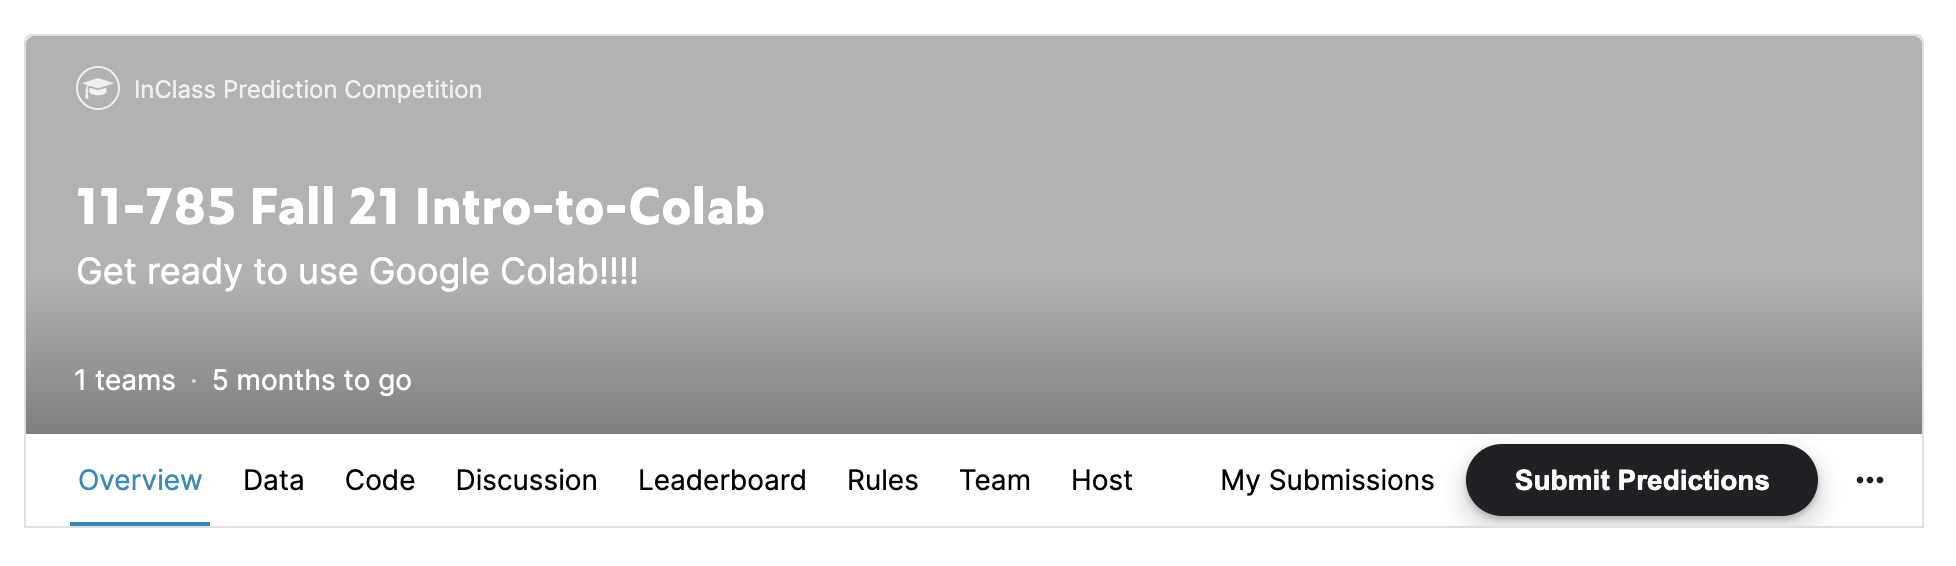

### Kaggle API

Using Kaggle API command to submit your result

Format: ```!kaggle competitions submit -c [COMPETITION] -f [FILE] -m [MESSAGE]```

In [ ]:
!kaggle competitions submit -c 11-785-fall-21-intro-to-colab -f competitions/11-785-fall-21-intro-to-colab/sampleSubmission.csv -m "submit"

**Don't forget to check your score on the leaderboard**

# Limitations and Tips for Google Colab Users

## Limitations [Please read carefully]

Colab is a savior, but it comes with a price.
1. You can only run 2 notebooks per google ID
2. There is a limitation per google ID in the GPU usage per 24 hours. So be wary about how
much free GPU you are utilizing. If you have the notebook on but are not using it, change to a
CPU or terminate the session if possible. ( ```Edit>Notebook settings``` )
3. Once, you reach the usage limit, you will be banned for up to 24 hours from using any GPU.
tips: you may want to use your other google IDs if you have
4. Also, if you want to run your models for a long time, do not travel with your laptop!
Network disconnectivity will be frustrating with Colab. So, try to be in one place.
6. ALL YOUR FILES WILL DISAPPEAR AS SOON AS YOU LEAVE Google Colab. So save them well in your drive.

## Google Colab Pro

If AWS does not work for you and you cannot endure the limited GPUs that Colab delivers, you
may turn to Colab Pro.

**Disclaimer**: All assignments can be finished without the Colab Pro subscription. That being said, if
you start early and use resources wisely, you can definitely reach the A-cutoff. We, staff of 11-785,
are only giving you another alternative. You are neither encouraged nor discouraged to use Colab
Pro by any one of us. The Colab Pro rules are subject to change, and we, staff of 11-785, can do
nothing about it.

Google Colab Pro provides priority access to faster GPUs, longer running notebooks and fewer
idle timeouts, and more memory. Restrictions are subject to change by Google, not us. You can
check the official website for more information. https://colab.research.google.com/signup


**tips**: You cannot subscribe to Colab Pro with your Andrew email. You can use your own google
account
* **Price: $9.99/month** Recurring billing. Remember to cancel it when you choose not to use it anymore.

* **GPUs: P100, V100** but you still have usage limits and available GPUs and TPUs may vary over time

* **Duration: 24 hrs** The notebook may stay connected for 24hrs, and idle timeouts are
relatively lenient
Availability: the US and Canada ONLY. Use VPN if you are in another country/region